In [1]:
import numpy as np

class ScratchLogisticRegression:
    """
    Scratch implementation of logistic regression

    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    bias : bool
      True if bias term is included
    verbose : bool
      True to output the learning process
    reg_lambda : float
      Regularization parameter

    Attributes
    ----------
    self.coef_ : ndarray, shape (n_features,)
      Parameters
    self.loss : ndarray, shape (self.num_iter,)
      Record losses on training data
    self.val_loss : ndarray, shape (self.num_iter,)
      Record loss on validation data
    """

    def __init__(self, num_iter=1000, lr=0.01, bias=True, verbose=False, reg_lambda=0.01):
        # Record hyperparameters as attributes
        self.num_iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.reg_lambda = reg_lambda
        # Prepare an array to record the loss
        self.loss = np.zeros(self.num_iter)
        self.val_loss = np.zeros(self.num_iter)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def hypothesis(self, X):
        """
        Compute the hypothesis for logistic regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix

        Returns
        -------
        ndarray, shape (n_samples,)
            Hypothesis values for logistic regression
        """
        z = np.dot(X, self.coef_)
        return self.sigmoid(z)

    def _gradient_descent(self, X, y):
        """
        Perform a single step of gradient descent.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Feature matrix
        y : ndarray, shape (n_samples,)
            Target values
        """
        m = X.shape[0]
        h = self.hypothesis(X)
        gradient = np.dot(X.T, (h - y)) / m
        # Apply regularization (excluding the bias term if bias is used)
        if self.bias:
            gradient[1:] += (self.reg_lambda / m) * self.coef_[1:]
        else:
            gradient += (self.reg_lambda / m) * self.coef_
        self.coef_ -= self.lr * gradient

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : ndarray, shape (n_samples, n_features)
            Features of validation data
        y_val : ndarray, shape (n_samples,)
            Correct answer value of validation data
        """

        if self.bias:
            X = np.c_[np.ones(X.shape[0]), X]
            if X_val is not None:
                X_val = np.c_[np.ones(X_val.shape[0]), X_val]

        # Initialize weights
        self.coef_ = np.zeros(X.shape[1])

        for i in range(self.num_iter):
            # Perform a gradient descent step
            self._gradient_descent(X, y)

            # Calculate and record the loss
            self.loss[i] = self._loss(self.hypothesis(X), y)
            if X_val is not None and y_val is not None:
                self.val_loss[i] = self._loss(self.hypothesis(X_val), y_val)

            if self.verbose and i % 100 == 0:
                print(f'Iteration {i}: loss = {self.loss[i]}')
                if X_val is not None and y_val is not None:
                    print(f'Iteration {i}: val_loss = {self.val_loss[i]}')

    def predict(self, X):
        """
        Estimate the label using logistic regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Sample

        Returns
        -------
        ndarray, shape (n_samples,)
            Estimated result by logistic regression
        """
        return self.predict_proba(X) >= 0.5

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.

        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Sample

        Returns
        -------
        ndarray, shape (n_samples,)
            Estimated result by logistic regression
        """
        if self.bias:
            X = np.c_[np.ones(X.shape[0]), X]
        return self.hypothesis(X)

    def _loss(self, h, y):
        """
        Compute the loss function for logistic regression with regularization.

        Parameters
        ----------
        h : ndarray, shape (n_samples,)
            Predicted probabilities
        y : ndarray, shape (n_samples,)
            Target values

        Returns
        -------
        float
            Regularized loss
        """
        m = y.size
        term1 = -y * np.log(h)
        term2 = (1 - y) * np.log(1 - h)
        cost = term1 - term2
        reg_term = (self.reg_lambda / (2 * m)) * np.sum(np.square(self.coef_[1:]))
        return np.mean(cost) + reg_term


### [Problem 5] Learning and estimation

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [4]:
# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [5]:
# Convert to binary classification problem (versicolor vs. virginica)
binary_mask = (y == 1) | (y == 2)
X = X[binary_mask]
y = y[binary_mask]

In [6]:
# Convert labels to 0 and 1
y = (y == 2).astype(int)

In [7]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Train the Scratch Logistic Regression model
scratch_model = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=True)
scratch_model.fit(X_train, y_train)

Iteration 0: loss = 0.6891335986141169
Iteration 100: loss = 0.4581283174556945
Iteration 200: loss = 0.3666324046174067
Iteration 300: loss = 0.3152181899694825
Iteration 400: loss = 0.2806322557408021
Iteration 500: loss = 0.2549921763434382
Iteration 600: loss = 0.23484904201004952
Iteration 700: loss = 0.21841740186771286
Iteration 800: loss = 0.20465832973146444
Iteration 900: loss = 0.1929138687453085


In [10]:
# Predict using the Scratch Logistic Regression model
y_pred_scratch = scratch_model.predict(X_test)

In [11]:
# Train the Scikit-learn Logistic Regression model
sklearn_model = LogisticRegression(max_iter=1000)
sklearn_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [12]:
# Predict using the Scikit-learn Logistic Regression model
y_pred_sklearn = sklearn_model.predict(X_test)

In [13]:
# Evaluate both models
accuracy_scratch = accuracy_score(y_test, y_pred_scratch)
precision_scratch = precision_score(y_test, y_pred_scratch)
recall_scratch = recall_score(y_test, y_pred_scratch)

accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
precision_sklearn = precision_score(y_test, y_pred_sklearn)
recall_sklearn = recall_score(y_test, y_pred_sklearn)

In [14]:
print("Scratch Logistic Regression Model:")
print(f"Accuracy: {accuracy_scratch:.4f}")
print(f"Precision: {precision_scratch:.4f}")
print(f"Recall: {recall_scratch:.4f}")

Scratch Logistic Regression Model:
Accuracy: 0.9000
Precision: 0.8750
Recall: 0.8750


In [15]:
print("\nScikit-learn Logistic Regression Model:")
print(f"Accuracy: {accuracy_sklearn:.4f}")
print(f"Precision: {precision_sklearn:.4f}")
print(f"Recall: {recall_sklearn:.4f}")


Scikit-learn Logistic Regression Model:
Accuracy: 0.8000
Precision: 0.7000
Recall: 0.8750


From the results above, shows that the scratch implementation of logistic regression performed well compared to the Scikit-learn Logistic Regression Model. 

The scratch implementation shows higher accuracy and precision compared to the scikit-learn model in this specific run. Both models have the same recall.

### [Problem 6] Plot of learning curve

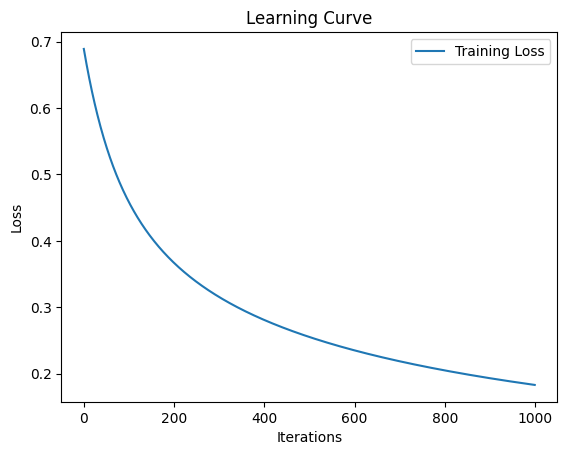

In [16]:
import matplotlib.pyplot as plt

# Plot learning curve
plt.plot(range(scratch_model.num_iter), scratch_model.loss, label='Training Loss')
if np.any(scratch_model.val_loss):
    plt.plot(range(scratch_model.num_iter), scratch_model.val_loss, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


From the above curve we can observe that the learning curve that the losses are falling properly.

### [Problem 7] Visualization of decision area

In [17]:
# Visualizing decision boundary
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')
    plt.show()

In [18]:
# Since we have 4 features, we will only use the first two for visualization
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]


In [25]:
# Re-train the scratch logistic regression model with 2 features
scratch_model_2d = ScratchLogisticRegression(num_iter=1000, lr=0.01, bias=True, verbose=False)
scratch_model_2d.fit(X_train_2d, y_train)

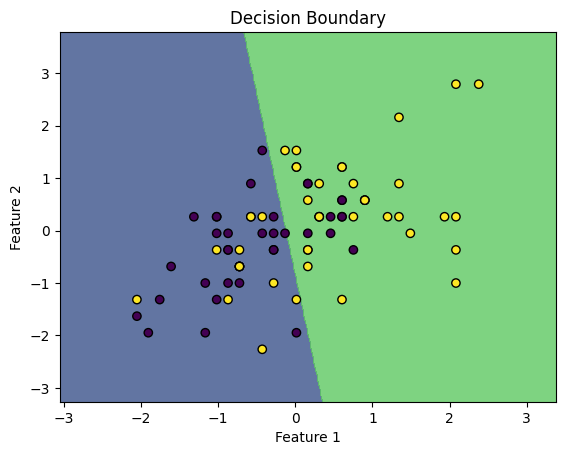

In [26]:
# Visualize the decision boundary
plot_decision_boundary(scratch_model_2d, X_train_2d, y_train)

### [Problem 8] (Advance assignment) Saving weights

In [27]:
import pickle

# Save the model weights
def save_model(model, filename):
    with open(filename, 'wb') as file:
        pickle.dump(model.coef_, file)

In [28]:
# Load the model weights
def load_model(filename):
    with open(filename, 'rb') as file:
        coef = pickle.load(file)
    return coef

In [29]:

# Save the weights of the trained model
save_model(scratch_model, 'scratch_logistic_regression_weights.pkl')

In [30]:

# Load the weights
loaded_coef = load_model('scratch_logistic_regression_weights.pkl')
print("Loaded Coefficients:", loaded_coef)

Loaded Coefficients: [ 0.15287005  0.24565091 -0.26561326  1.21421849  1.39581982]
